# BeT experiments

In [1]:
import os
import json

action_list = []

for file in os.listdir("./demos"):
    if file.startswith("*") or file.startswith("."):
        continue
    with open(f"./demos/{file}", "r") as f:
        data = json.load(f)
        for episode in data:
            action = episode[1]
            action_list = action_list + action

acceleration = list(map(lambda x: x[0], action_list))
steering = list(map(lambda x: x[1], action_list))

/Users/stanley/Library/CloudStorage/GoogleDrive-luis.jovel-portal@fulbrightmail.org/My Drive/Documents/Fulbright Application 2020-2021/Courses/Spring Semester 2024/Deep Decision and Reinforcement Learning/project/rl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


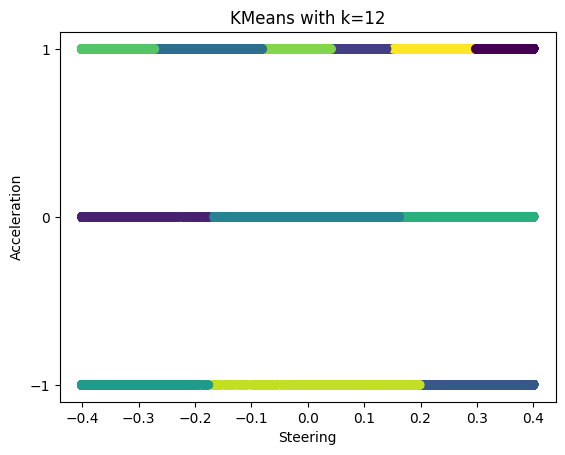

In [16]:
# calculate k means with k=9 and plot the resulting clusters using a scatter plot
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X = np.array(action_list)
kmeans = KMeans(n_clusters=12, random_state=0).fit(X)
plt.scatter(steering, acceleration, c=kmeans.labels_)
plt.xlabel("Steering")
plt.ylabel("Acceleration")
plt.title("KMeans with k=12")
plt.yticks(np.arange(-1, 1.1, 1))
plt.show()


# Plot utilities

/var/folders/hx/jy1sczd50w39n9lcqg3j55b80000gn/T/ipykernel_8489/3441999506.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels([f"{x/1000000}M" for x in plt.gca().get_xticks()])


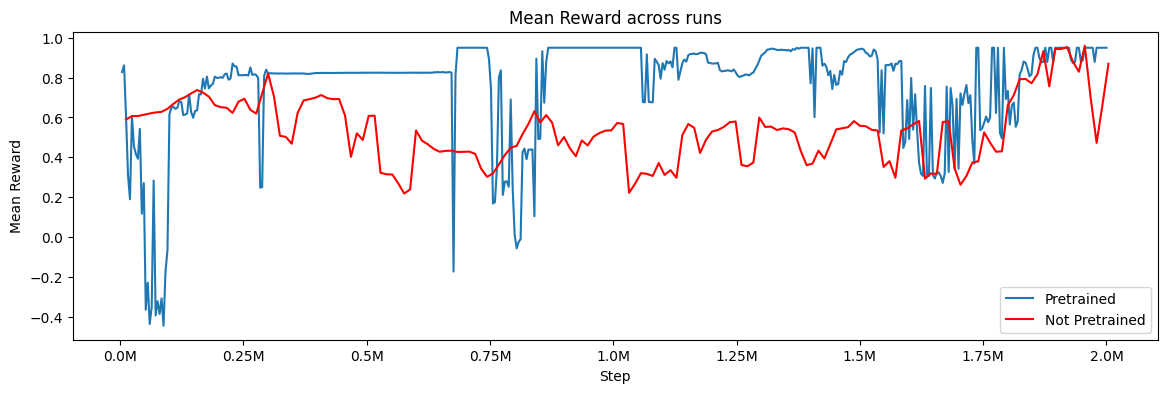

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from tbparse import SummaryReader
import numpy as np

log_dir = "./runs/num_history=10_pretrained_True_gamma_0.6_clip_0.3_entropy_0.0001_updates_per_iteration_3"
log_dir2 = "./runs/pretrained_False_gamma_0.99_clip_0.3_entropy_0.01_updates_per_iteration_3"

reader = SummaryReader(log_dir)
df_pretrained = reader.scalars
reader = SummaryReader(log_dir2)
df = reader.scalars

df_pretrained = df_pretrained[df_pretrained["tag"] == "mean_reward/train"]
df = df[df["tag"] == "mean_reward/train"]

plt.xlabel("Step")
plt.ylabel("Mean Reward")
plt.title("Mean Reward across runs")
plt.plot(df_pretrained["step"], df_pretrained["value"])
plt.plot(df["step"], df["value"], color="red")
plt.gcf().set_size_inches(14, 4)
plt.gca().set_xticklabels([f"{x/1000000}M" for x in plt.gca().get_xticks()])
plt.legend(["Pretrained", "Not Pretrained"])
plt.show()

